# Libraries and Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
%matplotlib inline

In [2]:
def Dataset(file_path):
    a = []
    with open(file_path, 'r') as file:
        data = file.readlines()
    for lines in data:
        data = lines.split()
        b = [data[0],data[1]]
        a.append(b)
        npa = np.array(a,dtype = np.float64)
    return npa


Here I read every line of the file and each line is split into two parts i.e `(x,y)` and then it is appended into a 2D array and all the coordinates is returned.

# Dataset-1 : Straight Line

## Function

In [3]:
def stline(x, m, c):
    return m * x + c

## Plot of Dataset

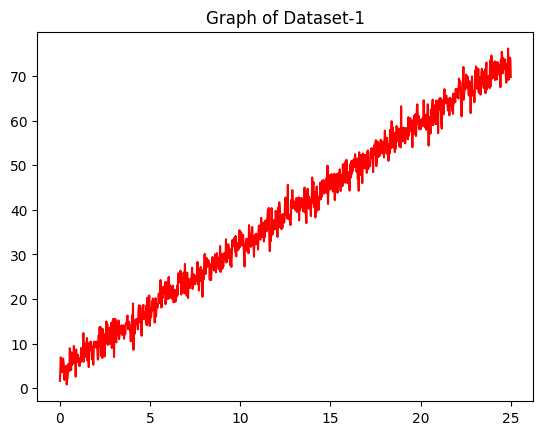

In [4]:
npa = Dataset("dataset1.txt")        
x1,y1 = npa[:,0],npa[:,1]
plt.plot(x1,y1,'r')
plt.title("Graph of Dataset-1")
plt.show()

## Linear Estimation 

In [5]:
fit1 = np.column_stack([x1,np.ones(len(x1))])
(m1, c1), _, _, _ = np.linalg.lstsq(fit1, y1, rcond=None)
print(f"The estimated equation is {m1} x + {c1}")
%timeit np.linalg.lstsq(fit1, y1, rcond=None)

The estimated equation is 2.791124245414921 x + 3.848800101430749
30.1 µs ± 58.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


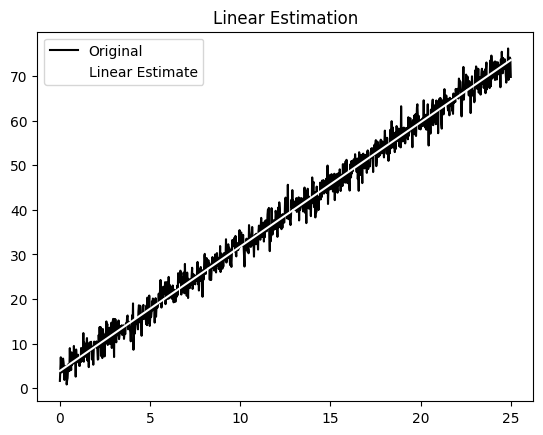

In [6]:
ye1 = stline(x1, m1, c1)
plt.plot(x1,y1,'k',label = "Original")
plt.plot(x1,ye1,'w',label = "Linear Estimate")
plt.title("Linear Estimation")
plt.legend()
plt.show()

## Estimation using curve_fit

In [7]:
(ce1, ce2), pcov = curve_fit(stline, x1, y1)
print(f"Estimated function: {ce1}x + {ce2}")
yc1 = stline(x1, ce1, ce2)
%timeit curve_fit(stline, x1, y1)

Estimated function: 2.7911242472208153x + 3.848800089588013
187 µs ± 47.8 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


The linear estimated equation is 2.791124245414921*x + 3.848800101430749
curve_fit estimated function: 2.7911242472208153*x + 3.848800089588013


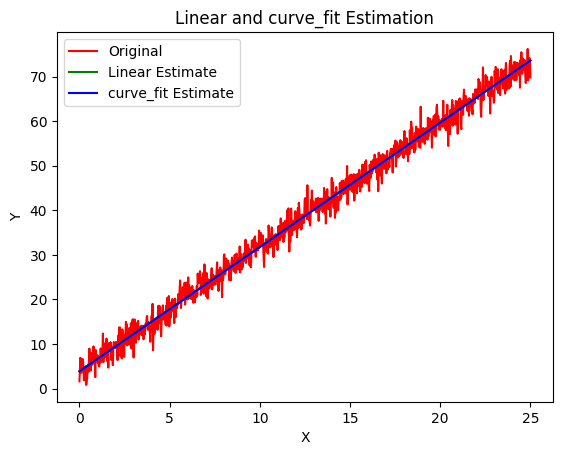

In [8]:
plt.plot(x1, y1, 'r', label='Original')
plt.plot(x1, ye1, 'g', label='Linear Estimate')
plt.plot(x1, yc1, 'b', label='curve_fit Estimate')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear and curve_fit Estimation")
plt.legend()

print(f"The linear estimated equation is {m1}*x + {c1}")
print(f"curve_fit estimated function: {ce1}*x + {ce2}")


Since, both `curve_fit` and `lstsq` are estimating to a straight line, we get both values of m and c almost identical

In [9]:
print("linalg.lstsq: ",end = "")
%timeit np.linalg.lstsq(fit1, y1, rcond=None)
print()
print("curve_fit: ",end = "")
%timeit curve_fit(stline, x1, y1)

linalg.lstsq: 30.1 µs ± 40.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

curve_fit: 162 µs ± 303 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


`curve_fit` takes longer time than `linalg.lstsq`. This is because non-linear regression methods, like `curve_fit`, can require more iterations to converge to a solution, especially if the model is complex or the initial parameter guesses are far from the true values.

## Errorbar Plotting

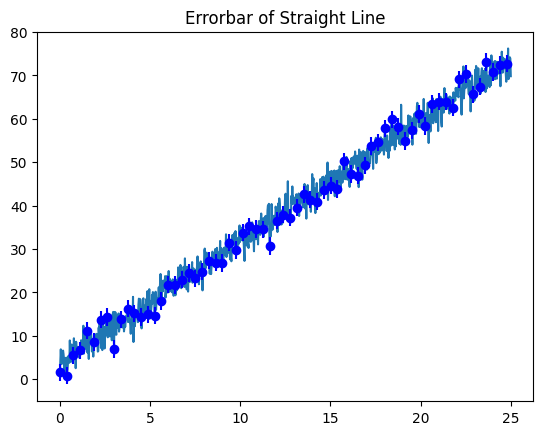

In [10]:
plt.plot(x1, y1)
plt.errorbar(x1[::15], y1[::15], np.std(y1-yc1),fmt='bo')
plt.title("Errorbar of Straight Line")
plt.show()

I have taken the length of the errobar to be the **standard deviation of difference of `y` and `y_est`**. This is because x noise can be estimated to y - y_est 

# Dataset-2 : Fourier Series 

## Plot of Dataset

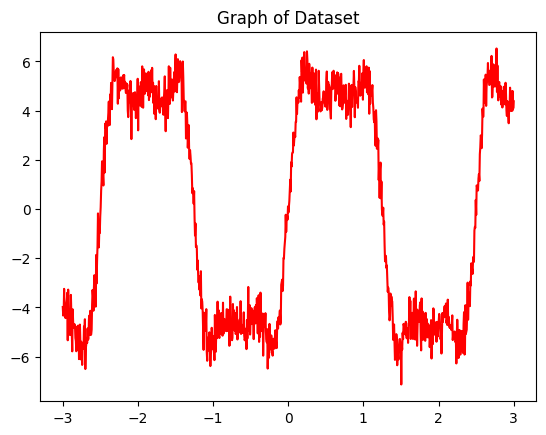

In [11]:
npa2 = Dataset("dataset2.txt")        
x2,y2 = npa2[:,0],npa2[:,1]
plt.plot(x2,y2,'r')
plt.title("Graph of Dataset")
plt.show()

We can see the graph here is an odd function i.e the fourier is a sum of sine functions

## Fundamental Frequency


In [12]:
def freq(x,a1,w1):
    return a1*np.sin(2*np.pi*w1*x)

(a1,w1),pcov = curve_fit(freq,x2,y2)
print(f'Fundamental Frequency is {w1}')

Fundamental Frequency is 0.4016623847634744


I have taken a sine function and curve_fit it to y to get the fundamental frequency

## Function

In [13]:
def fourier(x,p1,p2,p3):
    n = 3 #By trial and Error
    p = [p1,p2,p3]
    sum1 = 0
    for i in range(1,n+1):
         sum1 += p[i-1]* np.sin(2 * (2*i-1) * np.pi * w1 * x)
    return sum1


## Linear Estimation

In [14]:
fit2 = np.column_stack([x2,np.ones(len(x2))])
(m2,c2),_,_,_ = np.linalg.lstsq(fit2 , y2,rcond=None)
print(f"The estimated function: {m2}*x + {c2}")

The estimated function: -0.09813034036845343*x + -0.025875188673358113


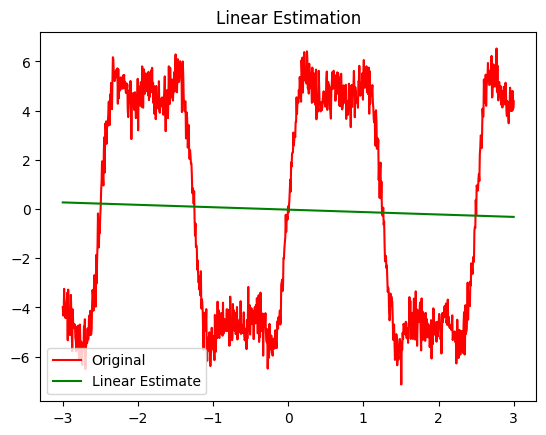

In [15]:
ye2 = stline(x2,m2,c2)
plt.plot(x2,y2,'r',label = "Original")
plt.plot(x2,ye2,'g',label = "Linear Estimate")
plt.title("Linear Estimation")
plt.legend()
plt.show()

Since, the function is not linear the linear estimation is very inaccurate. So, non-linear estimation should be used

## Estimation using curve_fit

In [16]:
(p1,p2,p3),_ = curve_fit(fourier, x2, y2)

yc2 = fourier(x2,p1,p2,p3)

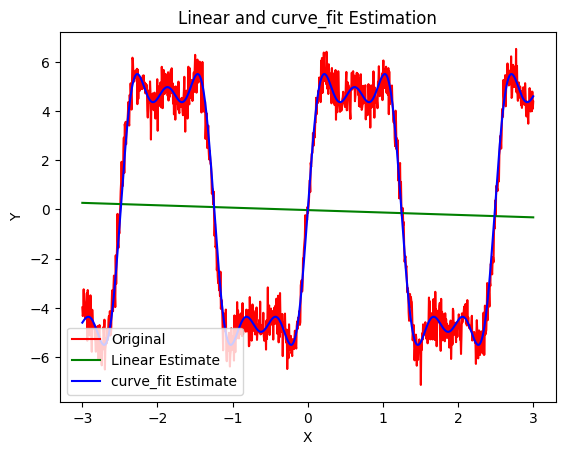

In [17]:
plt.plot(x2, y2, 'r', label='Original')
plt.plot(x2, ye2, 'g', label='Linear Estimate')
plt.plot(x2, yc2, 'b', label='curve_fit Estimate')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear and curve_fit Estimation")
plt.legend()

## Errorbar Plotting

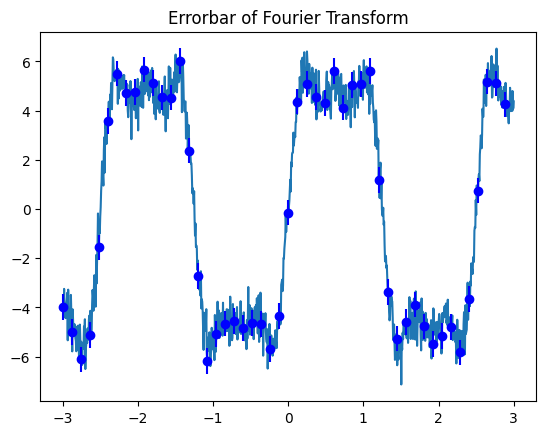

In [18]:
plt.plot(x2[::], y2[::])
plt.errorbar(x2[::20], y2[::20], np.std(y2-yc2),fmt='bo')
plt.title("Errorbar of Fourier Transform")
plt.show()

I have taken the length of the errobar to be the **standard deviation of difference of `y` and `y_est`**. This is because x noise can be estimated to y - y_est 

# Dataset-3 : Planck's Law

## Function

In [19]:
# Given,
k = 1.38e-23
c = 3e8

def planck(v,h,T):
    y = 2*h*v**3/((c**2)*(np.exp(h*v/(k*T))-1))
    return y


## Plot of Dataset

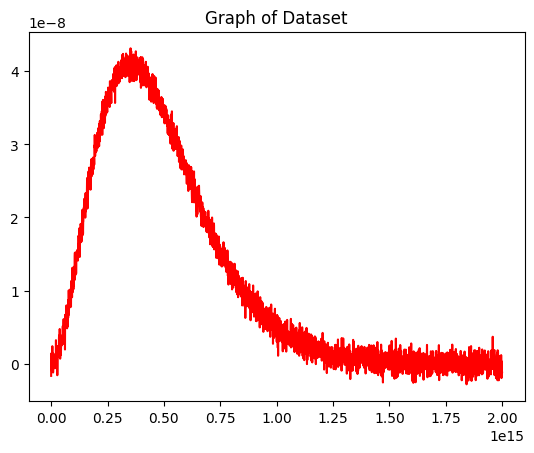

In [20]:
npa3 = Dataset("dataset3.txt")        
x3,y3 = npa3[:,0],npa3[:,1]
plt.plot(x3,y3,'r')
plt.title("Graph of Dataset")
plt.show()

## Linear Estimation

In [21]:
fit3 = np.column_stack([x3,np.ones(len(x3))])
(m3,c3),_,_,_ = np.linalg.lstsq(fit3 , y3,rcond=None)
print(f"The estimated function: {m3}*x + {c3}")

The estimated function: 4.162407832706358e-24*x + 3.121285313270046e-39


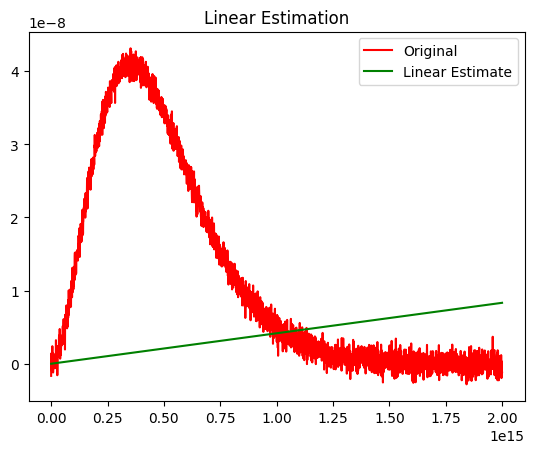

In [22]:
ye3 = stline(x3,m3,c3)
plt.plot(x3,y3,'r',label = "Original")
plt.plot(x3,ye3,'g',label = "Linear Estimate")
plt.title("Linear Estimation")
plt.legend()
plt.show()

Since, the function is not linear the linear estimation is very inaccurate. So, non-linear estimation should be used

## Estimation using curve_fit

In [24]:
(h, T), pcov = curve_fit(planck, x3, y3, (1e-34,1000))
print(f"Estimated H and T are: {h} and {T} K")
yc3 = planck(x3,h,T)

Estimated H and T are: 6.643229763105297e-34 and 6011.361524518249 K


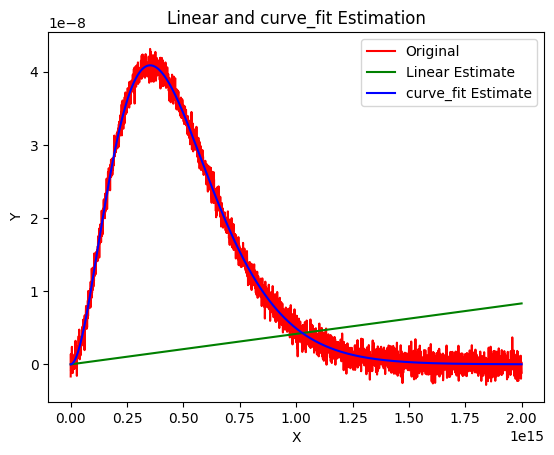

In [25]:
plt.plot(x3, y3, 'r', label='Original')
plt.plot(x3, ye3, 'g', label='Linear Estimate')
plt.plot(x3, yc3, 'b', label='curve_fit Estimate')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Linear and curve_fit Estimation")
plt.legend()
plt.show()

## Errorbar Plotting

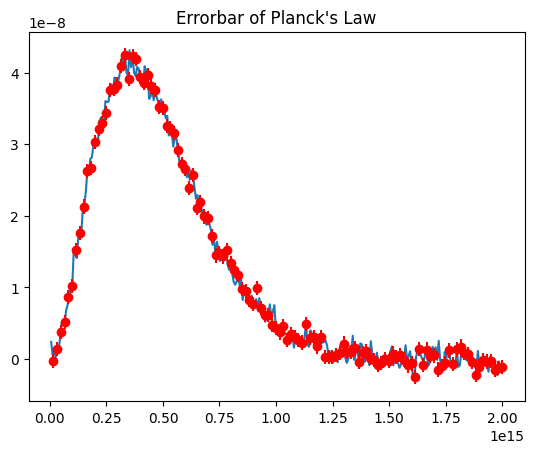

In [26]:
plt.plot(x3[::10], y3[::10])
plt.errorbar(x3[::25], y3[::25], np.std(y3-yc3),fmt='ro')
plt.title("Errorbar of Planck's Law")
plt.show()

I have taken the length of the errobar to be the **standard deviation of difference of `y` and `y_est`**. This is because x noise can be estimated to `y - y_est`. 

# Dataset-4 : Unknown

## Plot of Dataset

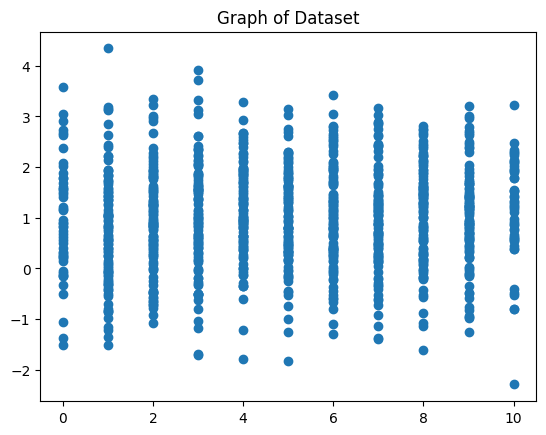

In [27]:
npa4 = Dataset("dataset4.txt")        
x4,y4 = npa4[:,0],npa4[:,1]
plt.scatter(x4, y4, label="Data")
plt.title("Graph of Dataset")
plt.show()

In [37]:
def y(x,y,k):
    yi = []
    for i in range(len(x)):
        if x[i] == k:
            yi.append(y[i])
    yi = np.array(yi)
    return yi

This function returns all the values of y for a particular value of x.

## Analysis of noise in Y 


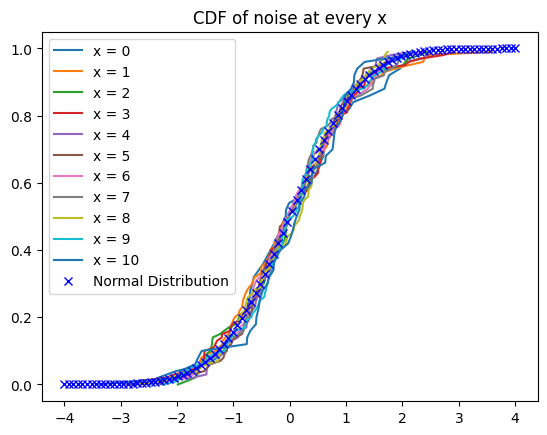

In [43]:
ya = []
xa = []
for i in range(11):
    k  = y(x4,y4,i)
    mean = np.sum(k)/len(k)
    ya.append(np.sort(k)-mean)
    xa.append(np.arange(len(k))/len(k))
    plt.plot(ya[i],xa[i],'-' ,label = f'x = {i}')
    
x = np.linspace(-4, 4, num=100)
y = norm.cdf(x, loc=0, scale=1)
plt.plot(x[:], y[:],'bx',label = "Normal Distribution")

plt.legend()
plt.title("CDF of noise at every x")
plt.show()

 We can see that the CDF of `Y - mean`  i.e noise of Y is the same as that of a standard normal distribution. We can therefore estimate Y to be a `mean + N(0,1)`

In [38]:
mean = []
for i in range(11):
    a = y(x4,y4,i)
    b = np.sum(a)/len(a)
    mean.append(b)


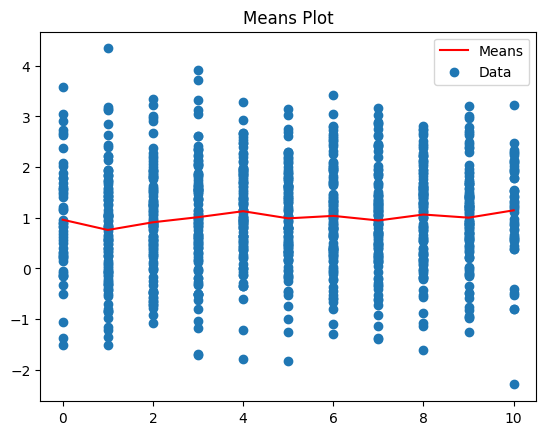

In [39]:
x = np.array([i for i in range(11)])

plt.plot(x,mean,'r',label = "Means")
plt.scatter(x4, y4, label="Data")
plt.title("Means Plot")
plt.legend()
plt.show()

## Estimation of means with curve_fit

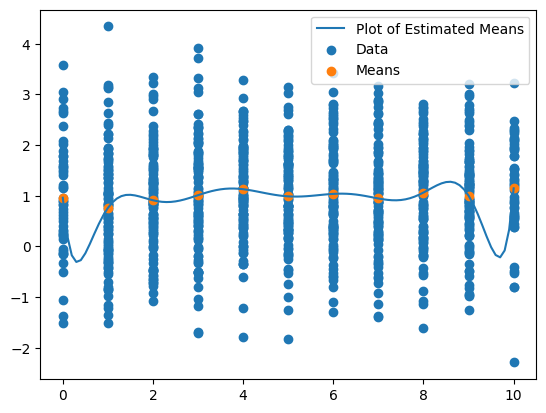

(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10) = (1.2216235437954278e-05, -0.0006085947166167213, 0.012995293139648992, -0.15541537850126927, 1.141084996776013, -5.299174667830496, 15.44355351799327, -26.993664089915907, 25.456983093081117, -9.80804795144344, 0.962239959304362)


In [42]:
def polynomial(x,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10):
    return a0*x**10 + a1*x**9 + a2*x**8 + a3*x**7 + a4*x**6 + a5*x**5 + a6*x**4 + a7*x**3 + a8*x**2 + a9*x + a10
t = np.arange(0,10.1,0.1)
(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10),pcov = curve_fit(polynomial,x,mean)
yest = polynomial(t,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10)
plt.plot(t,yest,label = "Plot of Estimated Means")
plt.scatter(x4, y4, label="Data")
plt.scatter(x,mean, label = "Means")
plt.legend()
plt.show()
print(f'(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10) = {(a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10)}' )

The means can be estimated by using the following function $\ a_0 x^{10} + a_1 x^9 + a_2 x^8 + a_3 x^7 + a_4 x^6 + a_5 x^5 + a_6 x^4 + a_7 x^3 + a_8 x^2 + a_9 x + a_{10}$ 